In [1]:
import yfinance as yf
import pandas as pd
import finstats as fs
import datetime as dt

# Define the ticker symbols
sp500_ticker = '^GSPC'
nasdaq_ticker = '^IXIC'

# Fetch historical data for S&P 500 and NASDAQ
sp500_data = yf.download(sp500_ticker, start='2020-01-01', end='2023-01-01')['Close'].rename('S&P500').resample('B').last().ffill()
nasdaq_data = yf.download(nasdaq_ticker, start='2020-01-01', end='2023-01-01')['Close'].rename('NQ100').resample('B').last().ffill()

# Combine data into a single DataFrame
combined_data = pd.DataFrame([sp500_data,nasdaq_data]).T


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Single price time series data analysis:

In [2]:
# Initialize Single Balance Stats:
single_balance_stats = fs.sbs(balance=sp500_data,bm_balance=nasdaq_data,start_date=dt.date(2020,1,1),end_date=dt.date(2023,1,1))

In [3]:
# Returns by month:
single_balance_stats.returns_by_month()

,January,February,March,April,May,June,July,August,September,October,November,December,Yearly Returns
Year,,,,,,,,,,,,,
2020,NaN,-0.084110,-0.125119,0.126844,0.045282,0.018388,0.055101,0.070065,-0.039228,-0.027666,0.107546,0.037121,0.164485
2021,-0.011137,0.026091,0.042439,0.052425,0.005486,0.022214,0.022748,0.028990,-0.047569,0.069144,-0.008334,0.043613,0.268927
2022,-0.052585,-0.031360,0.035773,-0.087957,0.000053,-0.083920,0.091116,-0.042440,-0.093396,0.079863,0.053753,-0.058971,-0.194428
Annualized Returns,-0.032083,-0.030836,-0.018806,0.026495,0.016742,-0.015695,0.055953,0.017800,-0.060369,0.039298,0.049918,0.006137,0.059803


In [4]:
# Key Stats:
single_balance_stats.df(freq='Y')

Stats Since                    2020-01-02
Geometric Mean Return            0.123317
Standard Deviation               0.200233
Downside Standard Deviation      0.111528
Sharpe Ratio                     0.505994
Sortino Ratio                    0.908445
Calmar Ratio                     0.467594
Max DD                           -0.33925
Max Return                       0.742563
Min Return                      -0.216677
VAR 99                           -0.38928
ES 99                           -0.205034
Positive %                       0.675472
Negative %                       0.324528
Max Losing Streak                     170
Recovery Max DD                       465
Correlation                      0.953183
Information Ratio                0.235035
Beta                             0.654688
Alpha                            0.059769
Jensen Alpha                      0.08429
Name: Y Stats, dtype: object

Multiple time series price data analysis:

In [5]:
# Initialize Multiple Balance Stats (mbs):
multiple_balance_stats = fs.mbs(asset_price_data=combined_data,bm_data=sp500_data,
                                start_date=dt.date(2020,1,1),end_date=dt.date(2023,1,1))

<Axes: xlabel='Date'>

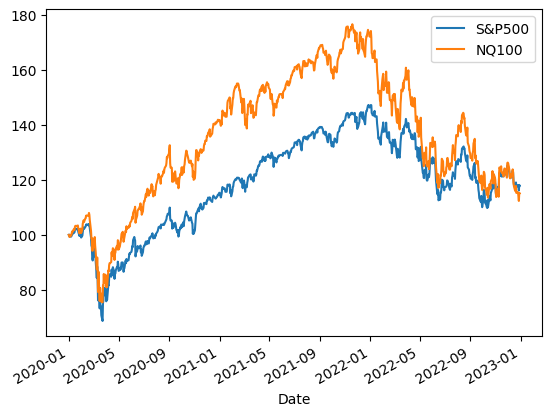

In [6]:
# Index returns plot:
multiple_balance_stats.indexed_returns().plot()

In [7]:
# Yearly stats:
multiple_balance_stats.stats_df(freq='Y')

,S&P500,NQ100
Stats Since,2020-01-02,2020-01-02
Geometric Mean Return,0.123317,0.093026
Standard Deviation,0.200233,0.329267
Downside Standard Deviation,0.111528,0.156243
Sharpe Ratio,0.505994,0.215709
Sortino Ratio,0.908445,0.454587
Calmar Ratio,0.467594,0.201487
Max DD,-0.33925,-0.363953
Max Return,0.742563,0.904891
Min Return,-0.216677,-0.352508


Seasonal Analaysis:

In [8]:
fs.seasonality(price_data=sp500_data)

,count,mean,std,min,25%,50%,75%,max
January,6.389056,-0.032083,0.030741,-0.052585,-0.042389,-0.032083,-0.021666,-0.011137
February,19.085537,-0.030836,0.058455,-0.084110,-0.058105,-0.031360,-0.003048,0.026091
March,19.085537,-0.018806,0.104474,-0.125119,-0.048066,0.035773,0.039101,0.042439
April,19.085537,0.026495,0.113968,-0.087957,-0.020277,0.052425,0.088999,0.126844
May,19.085537,0.016742,0.024420,0.000053,0.002766,0.005486,0.025191,0.045282
June,19.085537,-0.015695,0.064214,-0.083920,-0.034119,0.018388,0.020299,0.022214
July,19.085537,0.055953,0.032891,0.022748,0.038799,0.055101,0.072958,0.091116
August,19.085537,0.017800,0.057962,-0.042440,-0.007367,0.028990,0.049327,0.070065
September,19.085537,-0.060369,0.031787,-0.093396,-0.070765,-0.047569,-0.043408,-0.039228
October,19.085537,0.039298,0.059602,-0.027666,0.019591,0.069144,0.074490,0.079863
